In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv",sep=';')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


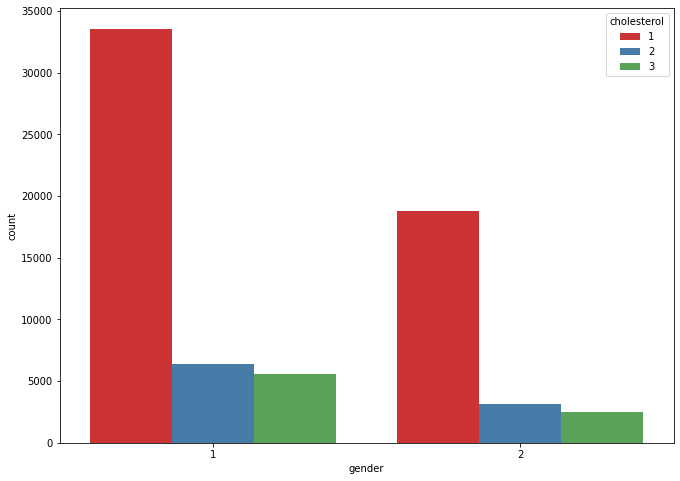

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='gender', hue='cholesterol', data = df, palette="Set1");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


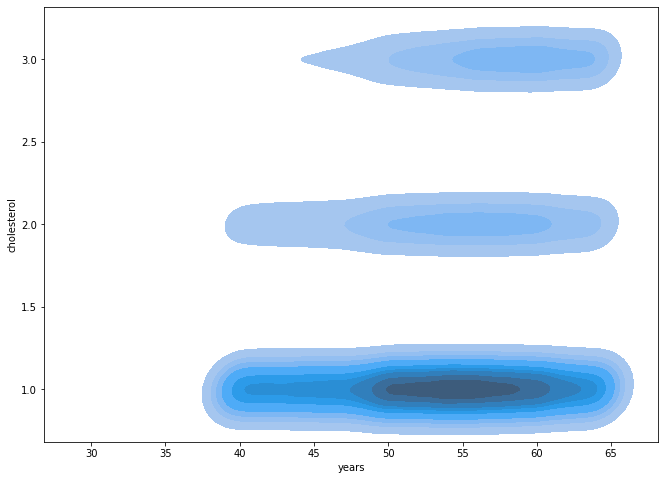

In [ ]:
#sns.countplot(x='age', hue='cholesterol', data = df, palette="Set1");
sns.kdeplot(df['years'],df['cholesterol'],shade =True)

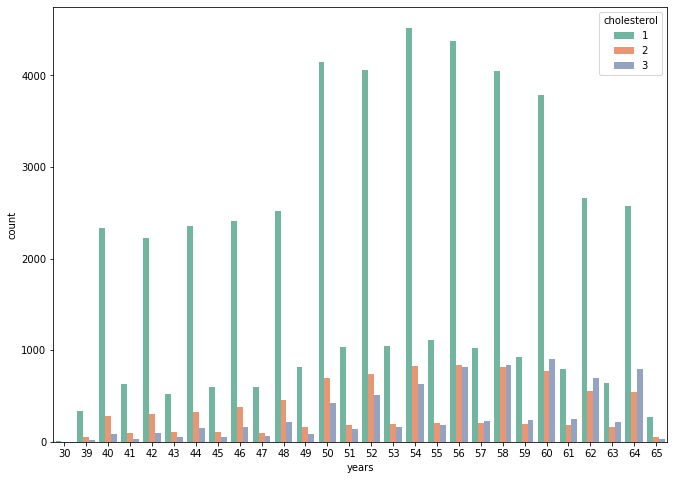

In [ ]:
sns.countplot(x='years', hue='cholesterol', data = df, palette="Set2");

In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

0.9981778829510735
[364.35659029]
34.53218255865795


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


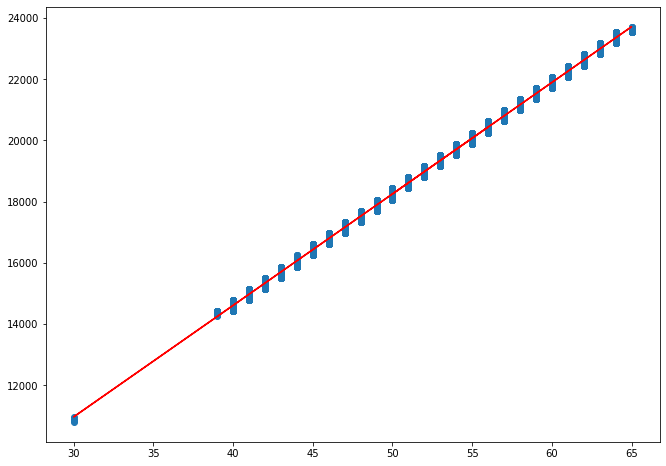

In [ ]:
from sklearn.linear_model import LinearRegression as lr
model =lr(copy_X=True, fit_intercept=True, normalize=False)
X = df['years'][:, None]
y = df['age']

temp =model.fit(X,y)
print(temp.score(X,y))
print(model.coef_)
print(model.intercept_)
z= model.predict(X)

plt.scatter(X,y)
plt.plot(X,z,color='red')

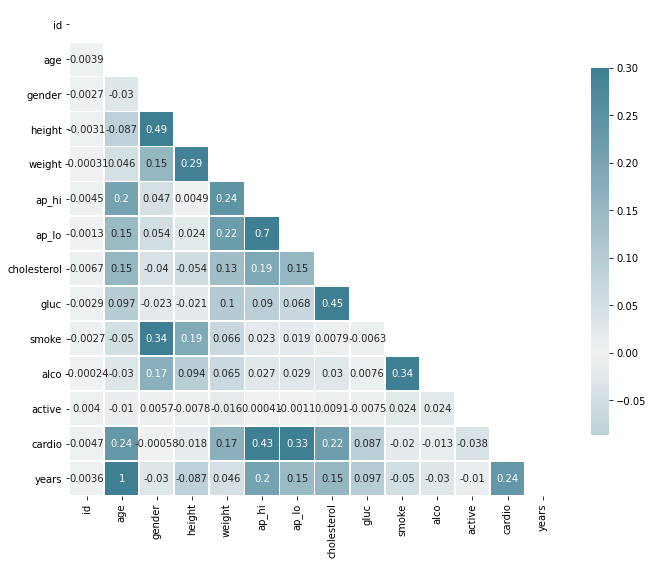

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220,221, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=False, linewidths=.75, cbar_kws={"shrink": .75});

Se pot observa mai multe corelatii dupa cum urmeaza : 
Cea mai mare fiind dintre ani si varsta ( cu o valoare de 1 este o regresie liniara perfecta fiind vorba despre acelai lucru scris sub o alta forma, dar aceasta nu poate fi luata in considerare, fiind un lucru evident.

Urmatoarea corelatie ca importanta este Presinua sistolica cu presiunea diastolica ( Indice de corelatie = 0.7 -> corelatie puternica ) Acest lucru rezulta din faptul ca sunt masuratori ale inimilor pacientilor, iar acestea ar trebui sa ai o legatura destul de puternica de cele mai multe ori 

De mentionat mai sunt si corelatiile glucoza cu colesterol, de unde rezulta o legatura slaba, dar prezenta intre cele doua valori 

Alte si mai slabe dar de urmarit sunt cele care depasesc valoarea de 0.2, dar nu merita atentie suplimentara. 

0.48846186995211127
[0.41853432]
28.404520315511483


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


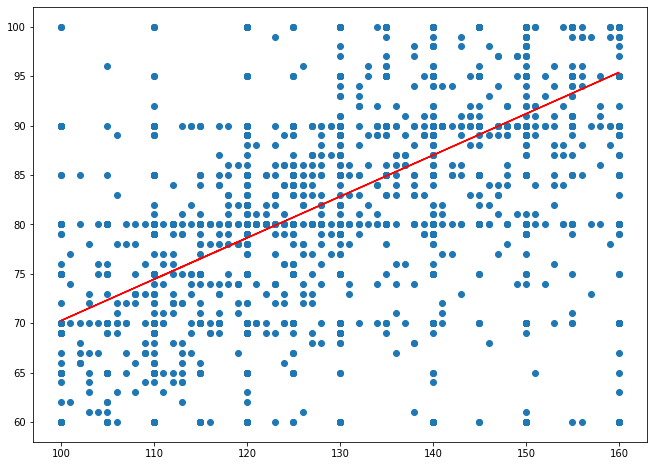

In [ ]:
from sklearn.linear_model import LinearRegression as lr
model =lr(copy_X=True, fit_intercept=True, normalize=False)
X = df['ap_hi'][:, None]
y = df['ap_lo']

temp =model.fit(X,y)
print(temp.score(X,y))
print(model.coef_)
print(model.intercept_)
z= model.predict(X)

plt.scatter(X,y)
plt.plot(X,z,color='red')

Asadar am si reprezentat grafic cea mai puternica relatie, cea dintre presiunea sistolica si diastolica si se poate observa si dreapta de regresie cu o forma crescatoare iar volorile de panta si intercept fiind  0.41853432 respectiv
28.404520315511483 de unde ar rezulta formula
Presiunea Sistolica ( mai mare) = Presiune diastolica * 0.41853432 + 28.404520315511483, formula valida pentru aproximativ 50% dintre subiecti supusi testarii, in urma filtrarii pe valorile extreme.